# Loading the Data

In [1]:
import pandas as pd

In [2]:
tweets = pd.read_csv("congress-tweets.csv", encoding='utf-8')
print(tweets.shape)
tweets.head()

(885832, 6)


,tweet,author,party,chamber,congress,retweet
0,VIDEO: Today's press conference w/ @SenBobCork...,"Alexander, Lamar (TN)",D,H,112,0
1,Will hold press conference in the Capitol's Ra...,"Alexander, Lamar (TN)",D,H,112,0
2,"""Major threats to our research universities"" O...","Alexander, Lamar (TN)",D,H,112,1
3,".@SenAlexander The Wind #PTC is ""a brazen flee...","Alexander, Lamar (TN)",D,H,112,1
4,VIDEO: Sen. Alexander on passing of Sen. @Dani...,"Alexander, Lamar (TN)",D,H,112,0


# Towards Data Science Pipeline

In [3]:
import pandas as pd
import numpy as np
import re
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
# Gensim
import gensim
from gensim.utils import simple_preprocess
# NLTK
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from collections import Counter
#from wordcloud import WordCloud
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jacquelinecruz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df = pd.read_hdf("sampled_df.h5", index_col=0)
print(len(df))

198521


In [5]:
# pre processing function of the tweets
# just combined it all into one function so it is less messy

def pre_process_df(df):
    df['tidy_tweet'] = df['tweet'].str.lower()
    # REMOVE '@USER'
    df['tidy_tweet'] = np.vectorize(remove_users)(df['tweet'],"@ [\w]*", "@[\w]*")
    print('Users Removed from Tweets')
    # REMOVE HASHTAGS
    df['tidy_tweet'] = np.vectorize(remove_hashtags)(df['tidy_tweet'], "# [\w]*", "#[\w]*")
    print('Hashtags Removed from Tweets')
    # REMOVE LINKS
    df['tidy_tweet'] = np.vectorize(remove_links)(df['tidy_tweet'])
    print('Links Removed from Tweets')
    # EXTRACT TWEET DATE
    df['date'] = df['tweet'].str.extract(r"([A-Z][a-z]+\s\d+,\s\d+)\s*$")
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    print('Dates Extracted')
    # REMOVE Punctuations, Numbers, and Special Characters
    df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
    print('Punctuation, Numbers, and Special Characters Removed from Tweets')
    # TOKENIZATION
    df['tidy_tweet_tokens'] = list(tokenize(df['tidy_tweet']))
    print('Tokenized')
    # REMOVE STOPWORDS
    df['tokens_no_stop'] = remove_stopwords(df['tidy_tweet_tokens'])
    print('Stop Words Removed from Tweets')
    # DROP EMPTY TWEETS
    df = df[df['tokens_no_stop'].apply(lambda x: len(x)) > 0]
    print('Empty Tweets Dropped')
    print('DataFrame Finished')
    return df
    
def remove_users(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
  
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

def remove_hashtags(tweet, pattern1, pattern2):
    r = re.findall(pattern1, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    
    r = re.findall(pattern2, tweet)
    for i in r:
        tweet = re.sub(i, '', tweet)
    return tweet

def remove_links(tweet):
    tweet_no_link = re.sub(r"http\S+", "", tweet)
    return tweet_no_link

def tokenize(tweet):
    for word in tweet:
        yield(gensim.utils.simple_preprocess(str(word), deacc=True))
        
def remove_stopwords(tweets):
    # Prepare Stop Words
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'https', 'twitter', 'religions', 'pic','twitt','today','will','thank', 'thanks',
                      'jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec', 'great', 'new', 'day', 'rt',
                      'th', 'morning', 'week', 'com', 'net'])
    #words to remove from stopwords
    remove_words = ['we','our','ours','ourselves']
    stop_words = [e for e in stop_words if e not in remove_words]
    return [[word for word in simple_preprocess(str(tweet)) if word not in stop_words] for tweet in tweets]

In [6]:
df = pre_process_df(df)

Users Removed from Tweets
Hashtags Removed from Tweets
Links Removed from Tweets
Dates Extracted


/var/folders/2w/1znq9cqn7cn9gd6rhlgdv7880000gn/T/ipykernel_41550/3824681370.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tidy_tweet'] = df['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")


Punctuation, Numbers, and Special Characters Removed from Tweets
Tokenized
Stop Words Removed from Tweets
Empty Tweets Dropped
DataFrame Finished


In [7]:
print(df.shape)
df.head()

(198521, 10)


,tweet,author,party,chamber,congress,retweet,tidy_tweet,date,tidy_tweet_tokens,tokens_no_stop
612145,We must fight for the victims and end #Humantr...,"Fincher, Stephen (TN-8)",R,H,113,0,We must fight for the victims and end Apr ...,2014-04-30,"[we, must, fight, for, the, victims, and, end,...","[we, must, fight, victims, end]"
616780,We need a select committee on Benghazi to fulf...,"Fleishmann, Charles (TN-3)",R,H,113,0,We need a select committee on Benghazi to fulf...,2013-09-11,"[we, need, select, committee, on, benghazi, to...","[we, need, select, committee, benghazi, fulfil..."
854334,My statement w/ @SenJohnMcCain on the permanen...,"Flake, Jeff (AZ)",R,S,113,0,My statement w on the permanent removal of t...,2014-11-24,"[my, statement, on, the, permanent, removal, o...","[statement, permanent, removal, former, direct..."
201165,Good morning Las Cruces! Glad to be visiting w...,"Perry, Scott (PA-4)",D,H,113,0,Good morning Las Cruces Glad to be visiting w...,2013-08-22,"[good, morning, las, cruces, glad, to, be, vis...","[good, las, cruces, glad, visiting, our, frien..."
677798,Thanks to everyone who came out for the Defian...,"LoBiondo, Frank (NJ-2)",R,H,113,0,Thanks to everyone who came out for the Defian...,2013-05-10,"[thanks, to, everyone, who, came, out, for, th...","[everyone, came, defiance, courthouse, confere..."


In [ ]:
dems = df[df['party'] == 'D']
reps = df[df['party'] == 'R']

In [ ]:
tokens = np.concatenate(df['tokens_no_stop'].values)
dem_tokens = np.concatenate(dems['tokens_no_stop'].values)
rep_tokens = np.concatenate(reps['tokens_no_stop'].values)

In [ ]:
words_for_cloud = " ".join(tokens)+" "
words_for_cloud_dem = " ".join(dem_tokens)+" "
words_for_cloud_rep = " ".join(rep_tokens)+" "

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(words_for_cloud)
 
# plot the WordCloud image                      
plt.figure(figsize = (4,4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('ALL TWEETS Word Cloud', fontsize=20)
 
plt.show()

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(words_for_cloud_dem)
 
# plot the WordCloud image                      
plt.figure(figsize = (4,4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('DEMOCRATS Word Cloud', fontsize=20)
 
plt.show()

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(words_for_cloud_rep)
 
# plot the WordCloud image                      
plt.figure(figsize = (4,4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('REPUBLICANS Word Cloud', fontsize=20)
 
plt.show()

In [ ]:
#filters the value_counts to quartile (here top 0.5% of words)
value_counts = pd.Series(list(tokens)).value_counts()
value_counts = value_counts[value_counts > 1]
value_counts = value_counts[value_counts > value_counts.quantile(0.995)]

In [ ]:
plt.figure(figsize = (5, len(value_counts)//5), facecolor = None)
plt.title('ALL Value Counts')
sns.barplot(x=value_counts.values, y=value_counts.index, color='purple')

In [ ]:
#filters the value_counts to quartile (here top 0.5% of words)
value_counts = pd.Series(list(dem_tokens)).value_counts()
value_counts = value_counts[value_counts > 1]
value_counts = value_counts[value_counts > value_counts.quantile(0.995)]

In [ ]:
plt.figure(figsize = (5, len(value_counts)//5), facecolor = None)
plt.title('DEM Value Counts')
sns.barplot(x=value_counts.values, y=value_counts.index, color='blue')

In [ ]:
#filters the value_counts to quartile (here top 0.5% of words)
value_counts = pd.Series(list(rep_tokens)).value_counts()
value_counts = value_counts[value_counts > 1]
value_counts = value_counts[value_counts > value_counts.quantile(0.995)]

In [ ]:
plt.figure(figsize = (5, len(value_counts)//5), facecolor = None)
plt.title('REP Value Counts')
sns.barplot(x=value_counts.values, y=value_counts.index, color='red')

## Religious Stuffs

In [ ]:
# corpus of religious words Preston made through various webpages

religious_words = pd.read_csv('religious_words.csv', squeeze=True)

In [ ]:
# create set of religious words and the list of tokens
# compare between sets, find overlapping words
# if there are no overlapping terms (i.e. the tokens contain no religious terms) then the boolean will evaluate to False
# if there ARE religious terms, the boolena will evalute to True

cont_rel_words_mask = df['tokens_no_stop'].apply(lambda x: len(set(religious_words) & set(x)) != 0)
df_religious = df[cont_rel_words_mask]

In [ ]:
df_religious

FINDING: Dems and Reps seem to use religious language the same amount

In [ ]:
df_religious.groupby('party')['tweet'].count() / df.groupby('party')['tweet'].count()

## Do Democrats actually swear more often than Republicans?

In [8]:
bad_words = pd.read_csv('bad-words.csv').squeeze('columns')

In [9]:
#filter tweets that contain bad words 
bad_words_mask = df['tokens_no_stop'].apply(lambda x: len(set(bad_words) & set(x)) != 0)
df_bad_words = df[bad_words_mask]

In [10]:
#find percentage of tweets that contain bad words for each party 
df_bad_words.groupby('party')['tweet'].count() / df.groupby('party')['tweet'].count()

party
D    0.007070
R    0.006697
Name: tweet, dtype: float64

In [11]:
df_bad_words

,tweet,author,party,chamber,congress,retweet,tidy_tweet,date,tidy_tweet_tokens,tokens_no_stop
787218,The House just passed H.R. 3973 - the Faithful...,"Yoho, Ted (FL-3)",R,H,113,0,The House just passed H R the Faithful...,2014-03-13,"[the, house, just, passed, the, faithful, exec...","[house, passed, faithful, execution, law, act,..."
31170,Alaska is so proud of our Spartans! The 4-25ex...,"Murkowski, Lisa (AK)",D,H,112,0,Alaska is so proud of our Spartans The ex...,2012-11-01,"[alaska, is, so, proud, of, our, spartans, the...","[alaska, proud, our, spartans, executed, every..."
326975,Max’s plan to award the Devil’s Brigade the Co...,"Baucus, Max (MT)",D,S,113,0,Max s plan to award the Devil s Brigade the Co...,2013-05-23,"[max, plan, to, award, the, devil, brigade, th...","[max, plan, award, devil, brigade, congression..."
431346,High gas prices are the enemy of the family bu...,"Graves, Tom (GA-09)",R,H,112,0,High gas prices are the enemy of the family bu...,2011-05-11,"[high, gas, prices, are, the, enemy, of, the, ...","[high, gas, prices, enemy, family, budget, con..."
203131,Today is the 50th anniversary of the assassina...,"Petri, Tom (WI-6)",D,H,113,0,Today is the th anniversary of the assassina...,2013-11-22,"[today, is, the, th, anniversary, of, the, ass...","[anniversary, assassination, pres, kennedy, lo..."
...,...,...,...,...,...,...,...,...,...,...
666414,"Tune in this morning to @ThisWeekABC, where I’...","Kline, John (MN-2)",R,H,113,0,Tune in this morning to where I ll be talkin...,2014-06-22,"[tune, in, this, morning, to, where, ll, be, t...","[tune, talking, find, local, showtime]"
175559,Great cause! MT @MALIDavis: My NHS Group with ...,"Long, Billy (MO-7)",D,H,113,0,Great cause MT My NHS Group with Congressma...,2014-05-12,"[great, cause, mt, my, nhs, group, with, congr...","[cause, mt, nhs, group, congressman, lobiondo,..."
11220,Wiser heads at DOJ prevail and throw this dumb...,"Cornyn, John (TX)",D,H,112,0,Wiser heads at DOJ prevail and throw this dumb...,NaT,"[wiser, heads, at, doj, prevail, and, throw, t...","[wiser, heads, doj, prevail, throw, dumb, dang..."
410193,We’ve got to be able to identify the enemy if ...,"Duncan, Jeff (SC-03)",R,H,112,0,We ve got to be able to identify the enemy if ...,2011-12-12,"[we, ve, got, to, be, able, to, identify, the,...","[we, got, able, identify, enemy, we, ever, goi..."


In [12]:
##find frequency of each bad word in tweets  
bad_words_array = np.array(bad_words.values)
d = {}
for word in bad_words_array:
    if word not in d:
        d[word] = 0 
    for tweet in df_bad_words['tidy_tweet_tokens']:
        if word in tweet:
            d[word] += 1 
            

bad_word = d.keys()
counts = d.values()

bad_word_counts = pd.DataFrame(list(zip(bad_word, counts)),
               columns =['word', 'count'])


In [13]:
#find top 20 words that appear the most  
top_twenty = bad_word_counts.nlargest(20, 'count')
print(top_twenty)

          word  count
6        randy     91
711    servant     85
972     breast     79
290      enemy     78
469    suicide     71
503        die     58
303      crack     53
345       dick     53
342       rape     46
144     beaver     42
901     stupid     38
892      lynch     30
19        hell     27
236       dumb     21
398      dirty     20
480     willie     20
67          ho     19
315       nazi     19
612      devil     19
135  slaughter     18


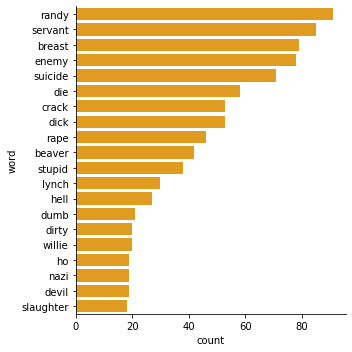

In [14]:
import seaborn as sns
sns.catplot(data=top_twenty, x='count', y='word', kind='bar', color='orange')

In [16]:
counts_party = df_bad_words.groupby('party')['tweet'].count().reset_index()

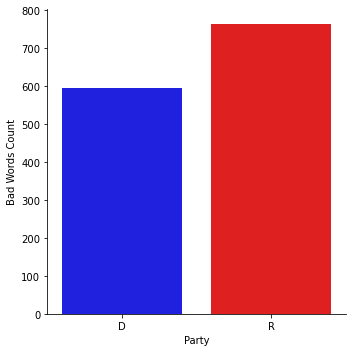

In [17]:
b = sns.catplot(data=counts_party, x='party', y='tweet', kind='bar', color='gray',
               palette=sns.color_palette(['blue', 'red']))
b.set_axis_labels("Party", "Bad Words Count")